# Feature Profiling using SweetViz

This notebook explains how to use `SweetViz` to create feature profiles of a `pandas` dataframe and both view the profile in the notebook and save to an HTML file.

### Packages

This tutorial uses:
* [pandas](https://pandas.pydata.org/docs/)
* [statsmodels](https://www.statsmodels.org/stable/index.html)
    * [statsmodels.api](https://www.statsmodels.org/stable/api.html#statsmodels-api)
* [numpy](https://numpy.org/doc/stable/)
* [SweetViz](https://github.com/fbdesignpro/sweetviz)

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

import sweetviz as sv

## Reading the data

The data is from `rdatasets` imported using the Python package `statsmodels`.

In [2]:
df = sm.datasets.get_rdataset('flights', 'nycflights13').data

## Feature Engineering

### Convert the times from floats or ints to hour and minutes

Convert some of the fields into more meaningful fields to better understand the time flights depart and arrive.  Next the original fields are dropped as they are now redundant.

In [3]:
df.dropna(inplace=True)
df['arr_hour'] = df.arr_time.apply(lambda x: int(np.floor(x/100)))
df['arr_minute'] = df.arr_time.apply(lambda x: int(x - np.floor(x/100)*100))
df['sched_arr_hour'] = df.sched_arr_time.apply(lambda x: int(np.floor(x/100)))
df['sched_arr_minute'] = df.sched_arr_time.apply(lambda x: int(x - np.floor(x/100)*100))
df['sched_dep_hour'] = df.sched_dep_time.apply(lambda x: int(np.floor(x/100)))
df['sched_dep_minute'] = df.sched_dep_time.apply(lambda x: int(x - np.floor(x/100)*100))
df.rename(columns={'hour': 'dep_hour',
                   'minute': 'dep_minute'}, inplace=True)
df.drop(columns=['time_hour', 'dep_time', 'sched_dep_time', 'arr_time', 'sched_arr_time', 'dep_delay'], inplace=True)

## Profile Features

The paramaeter `pairwise_analysis` defaults to `auto`, so the pairwise analysis is only run if the number of features is below a threshold.  As this data contains more features than that threshold, `pairwise_analysis` is set to `on` to cause it to be run.

In [4]:
report = sv.analyze(df, pairwise_analysis='on')

### Show profile with notebook widgets


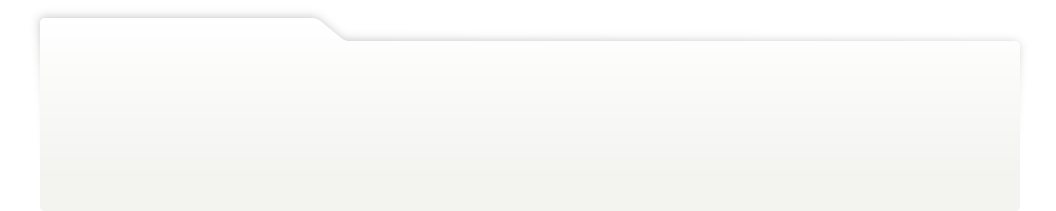
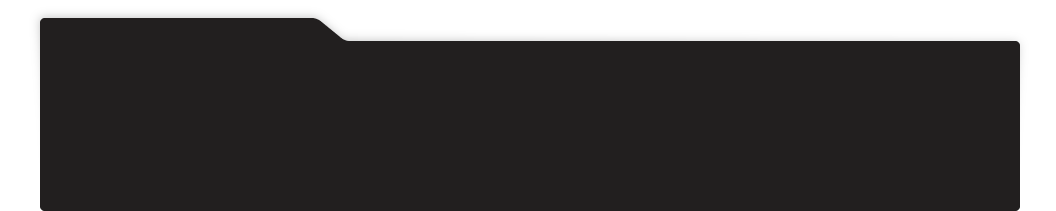
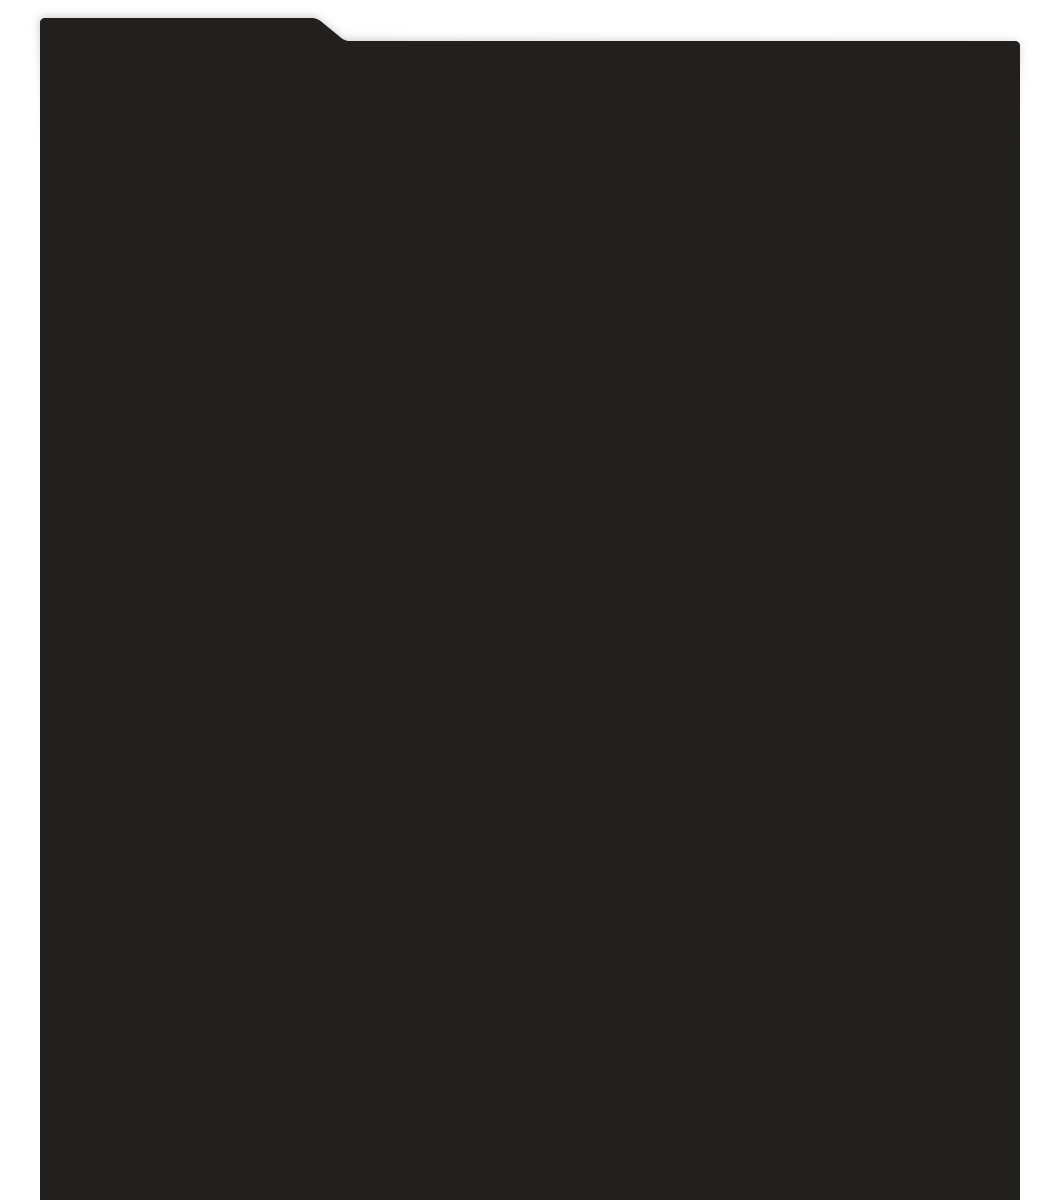
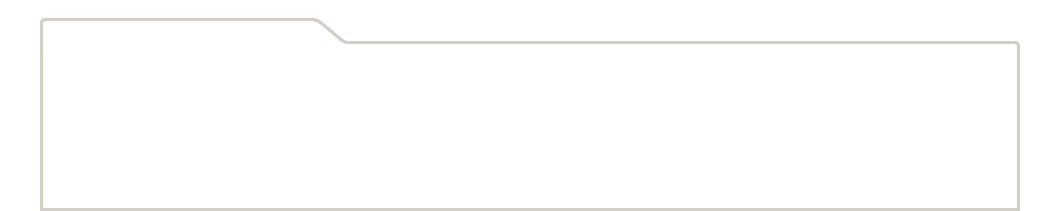
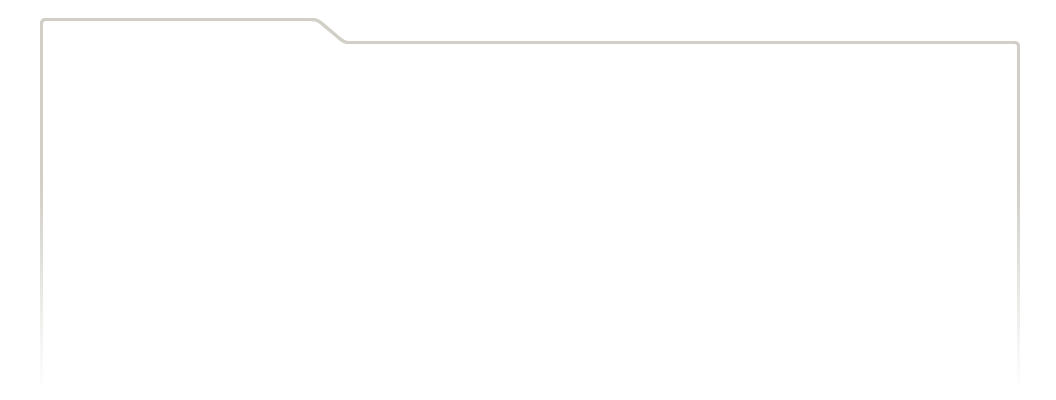
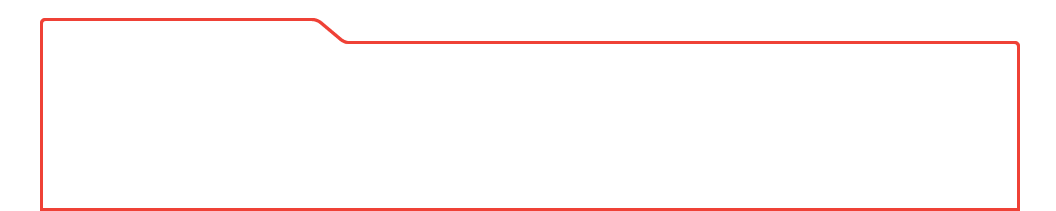
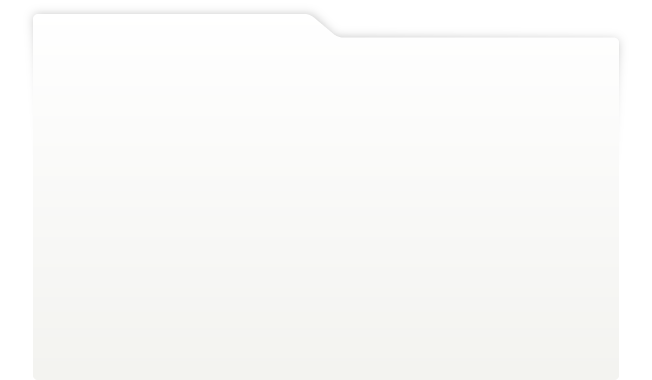
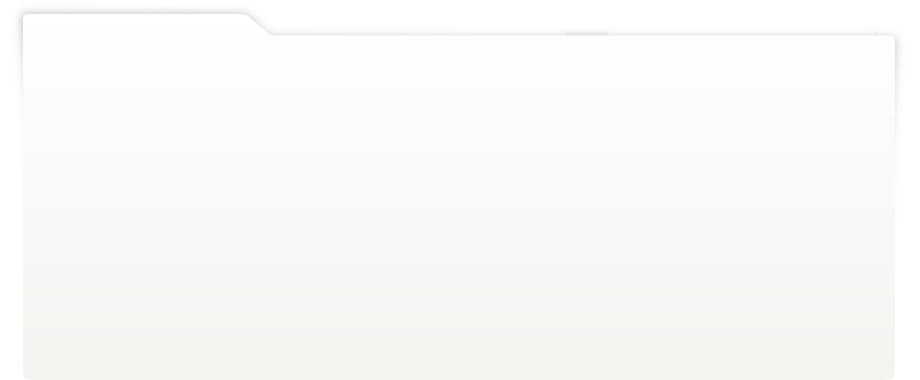
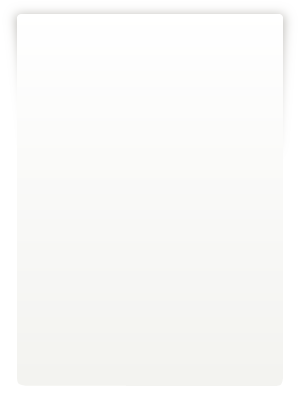
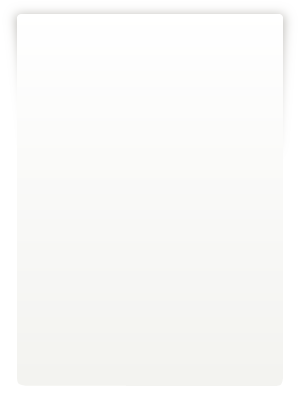
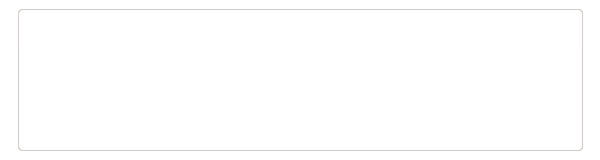
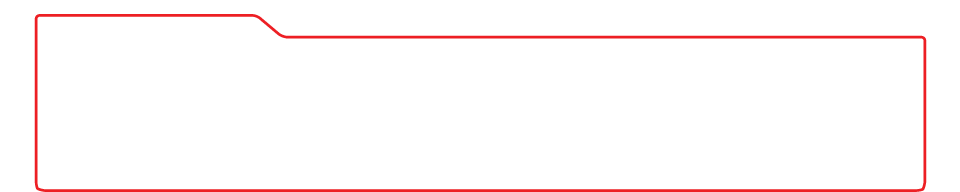
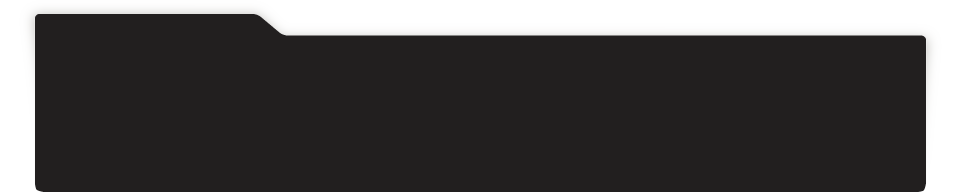
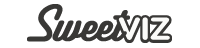
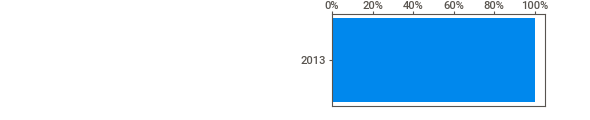
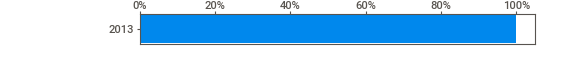
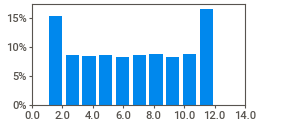
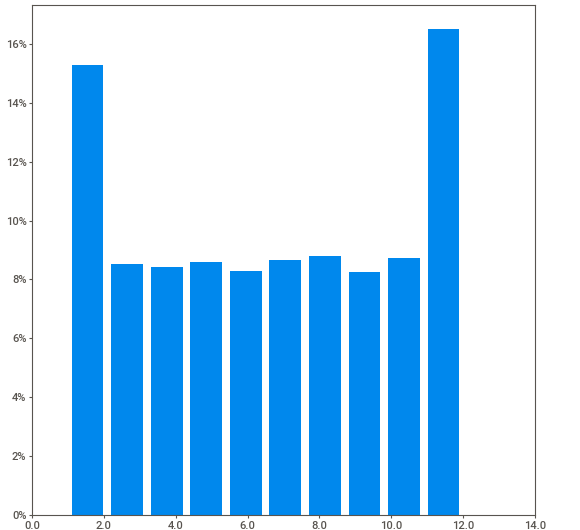
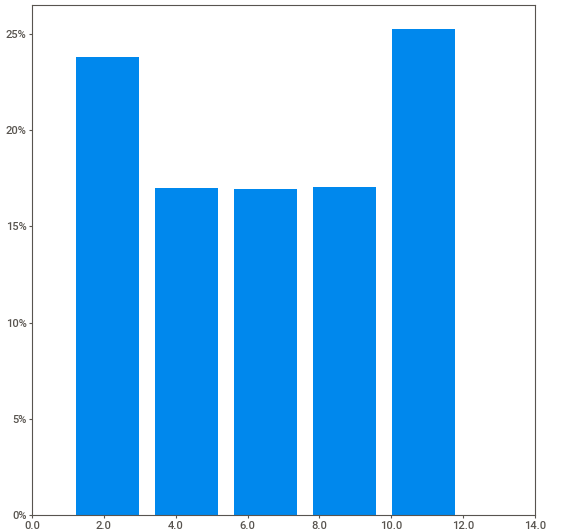
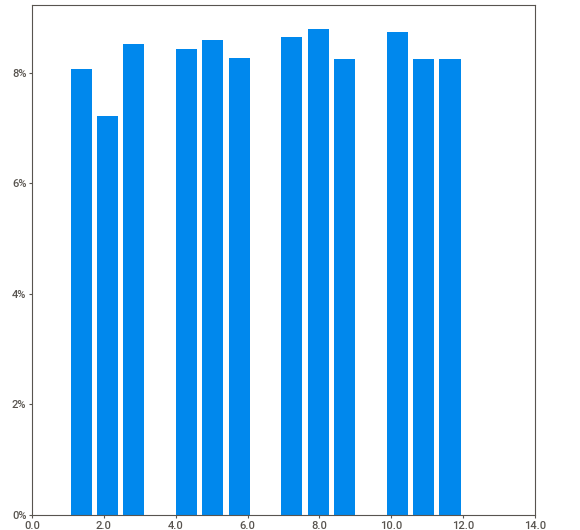
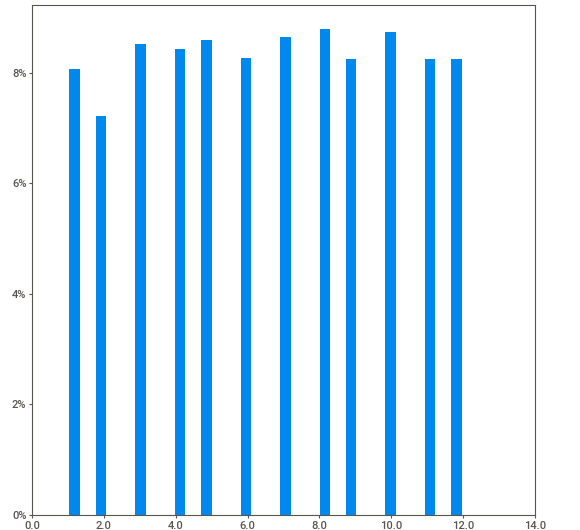
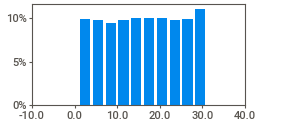
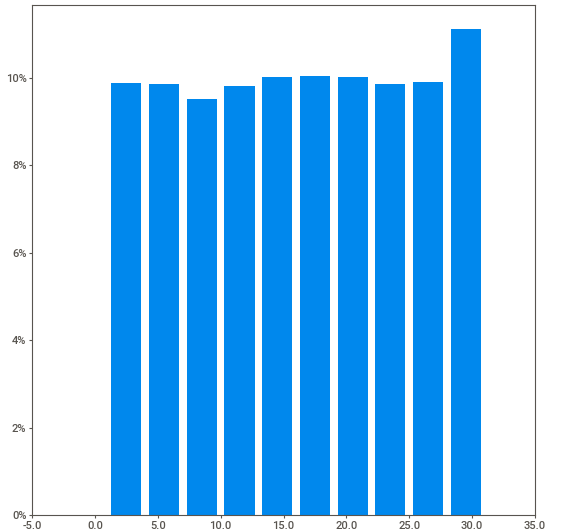
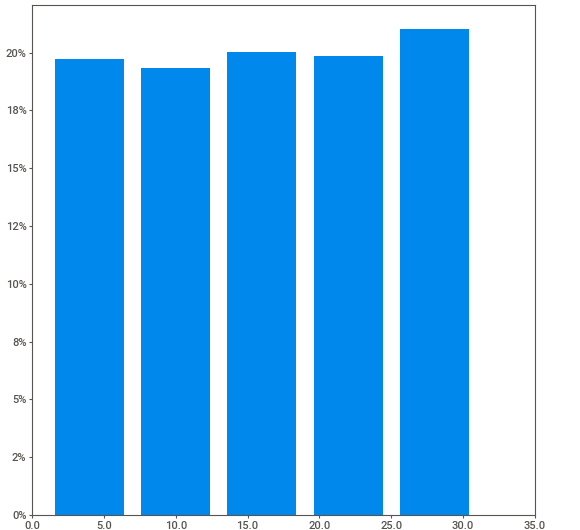
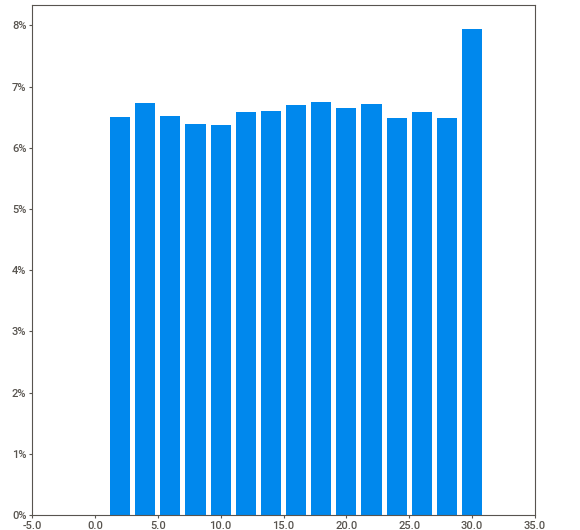
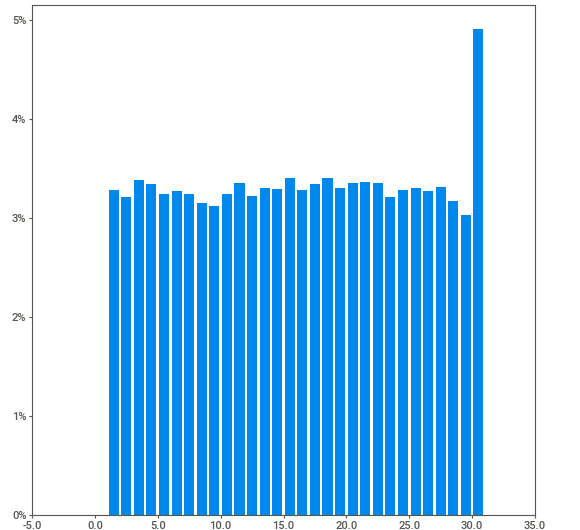
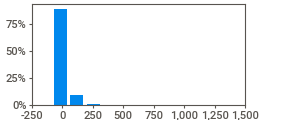
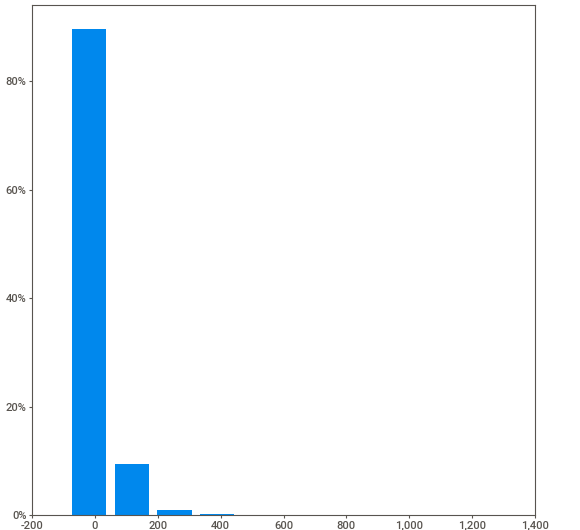
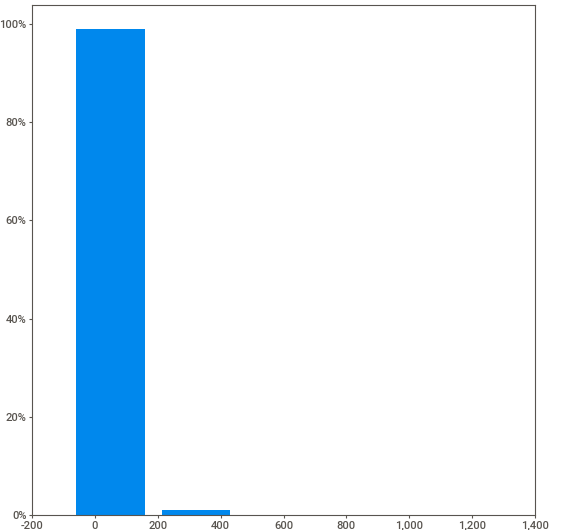
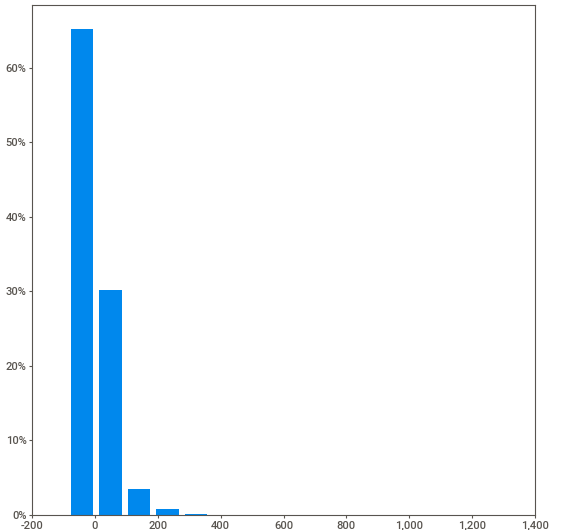
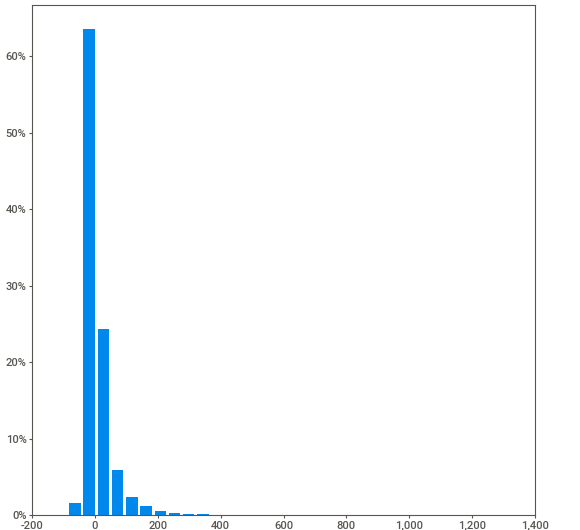
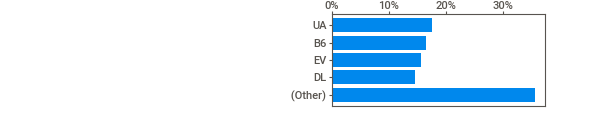
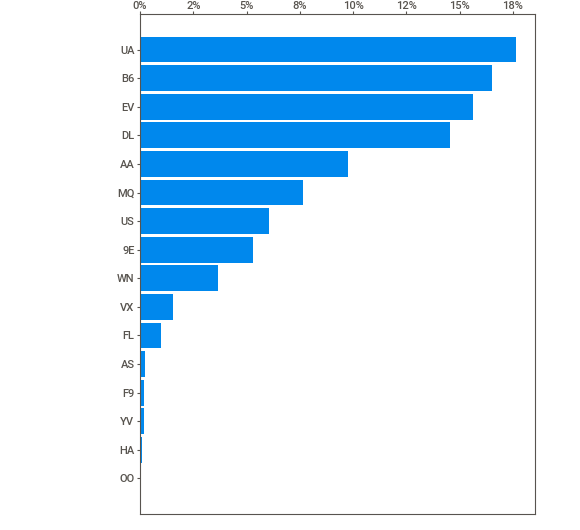
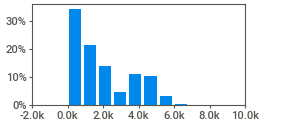
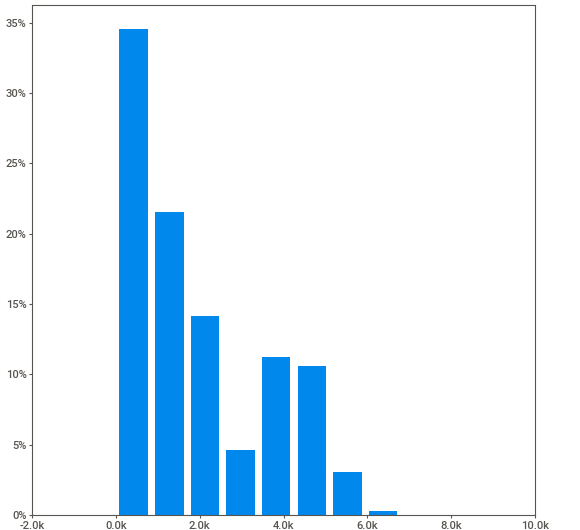
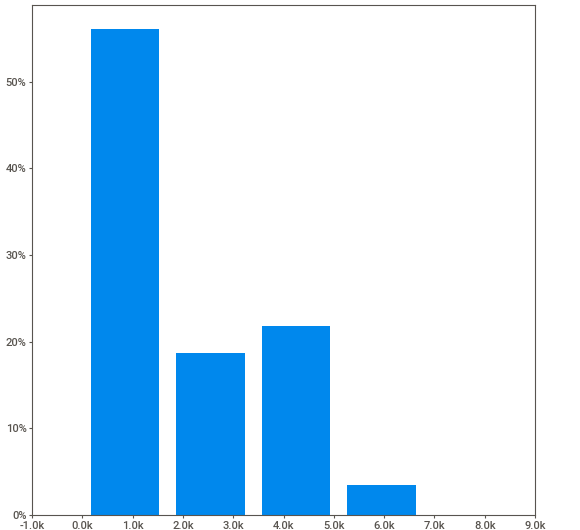
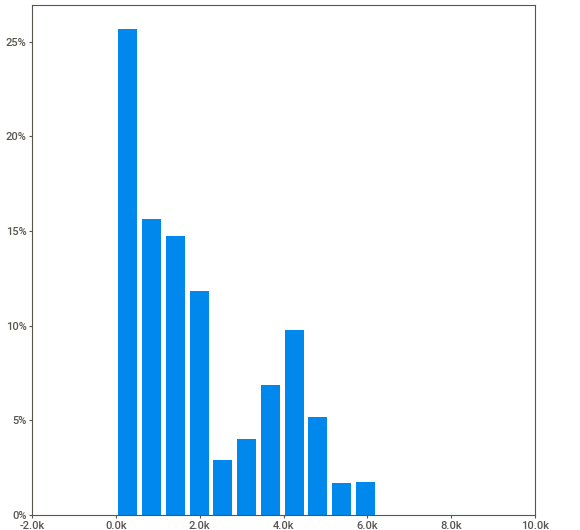
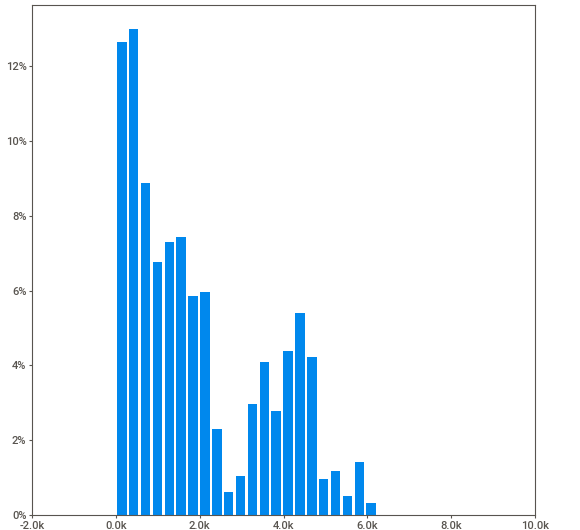
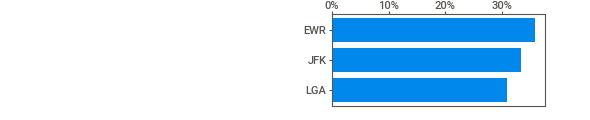
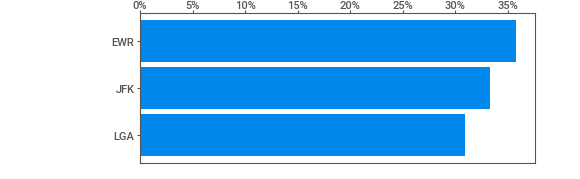
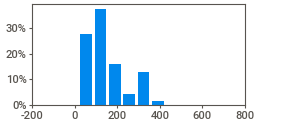
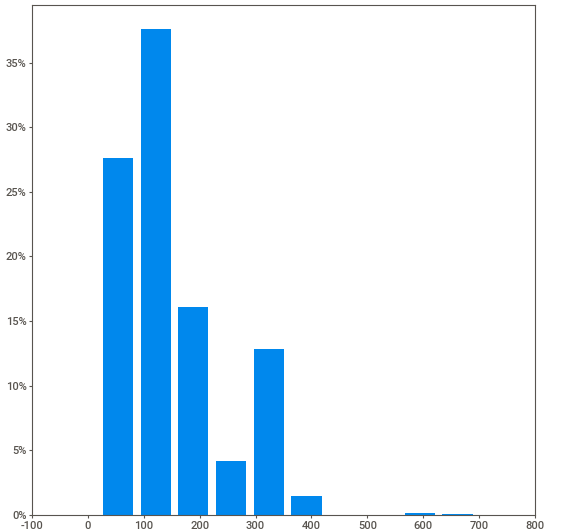
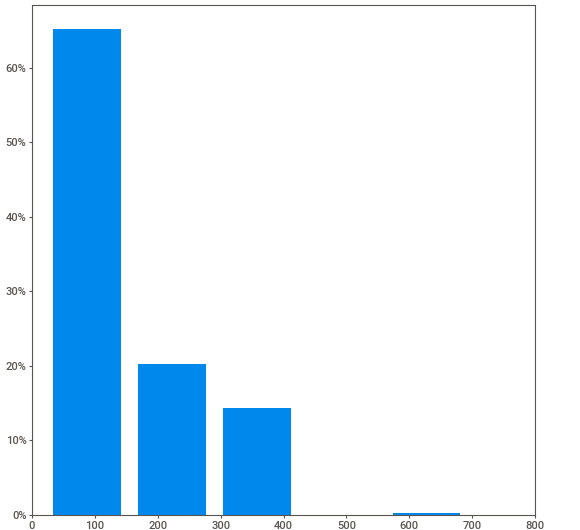
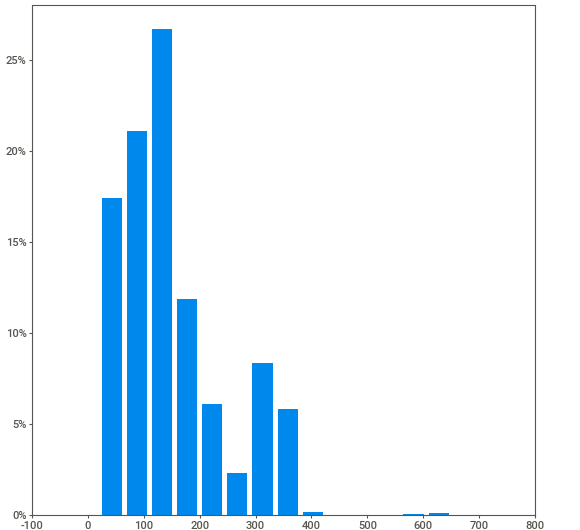
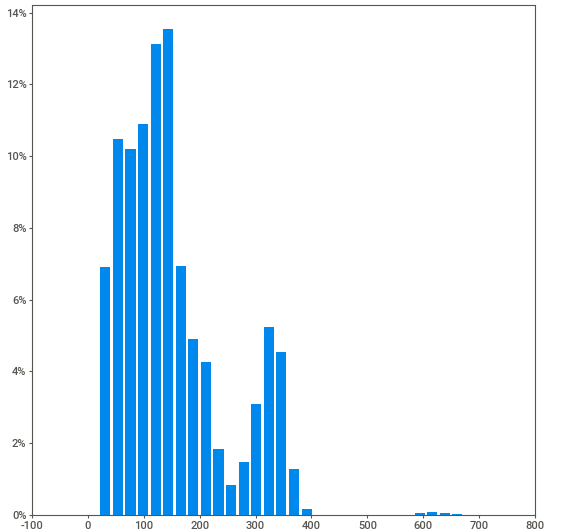
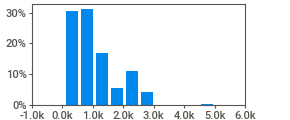
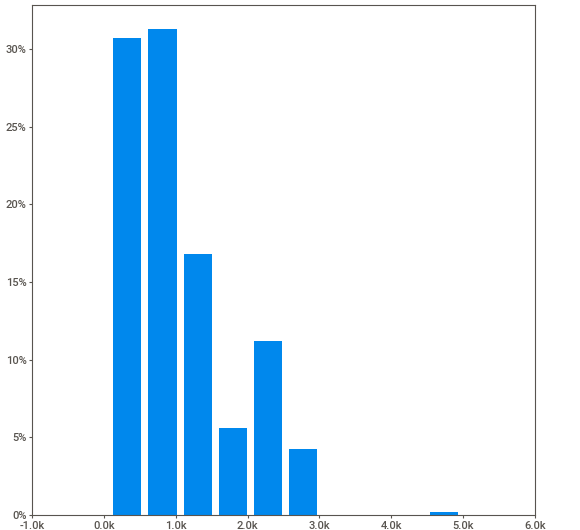
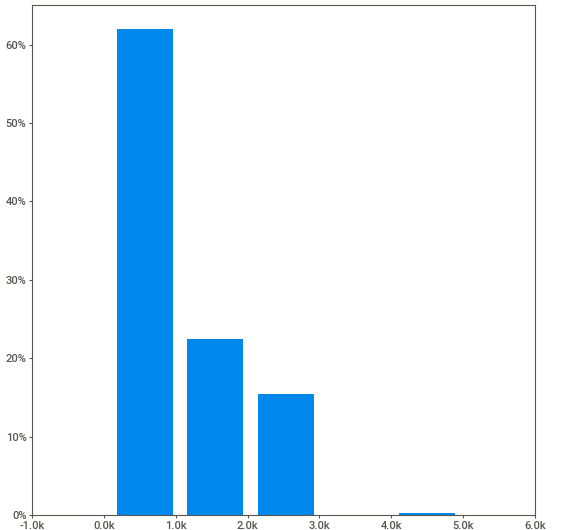
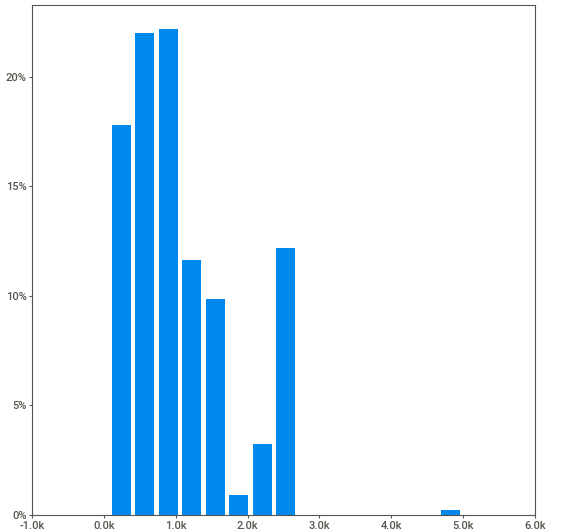
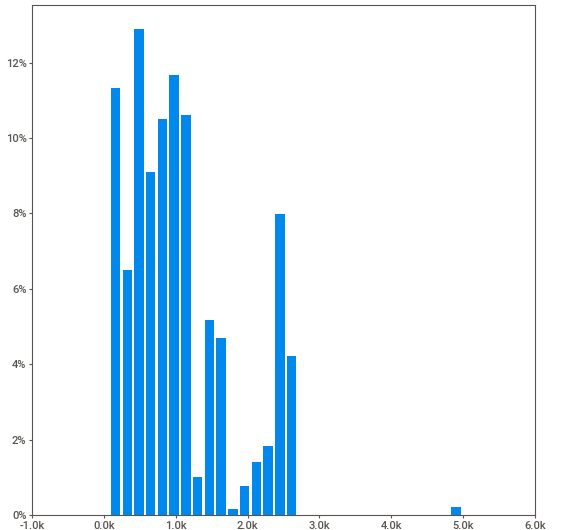
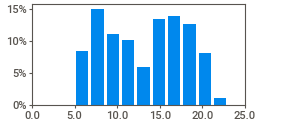
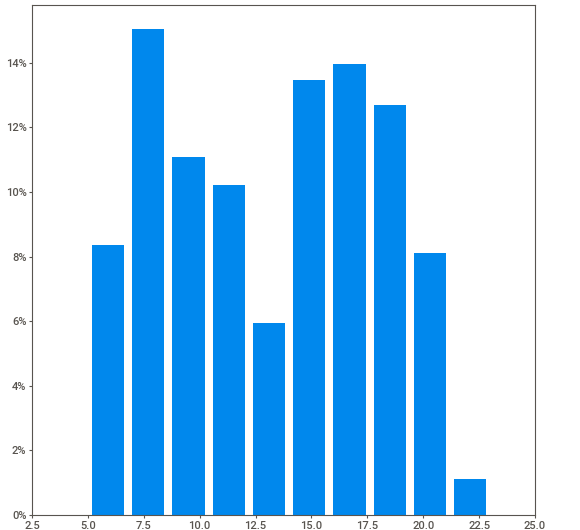
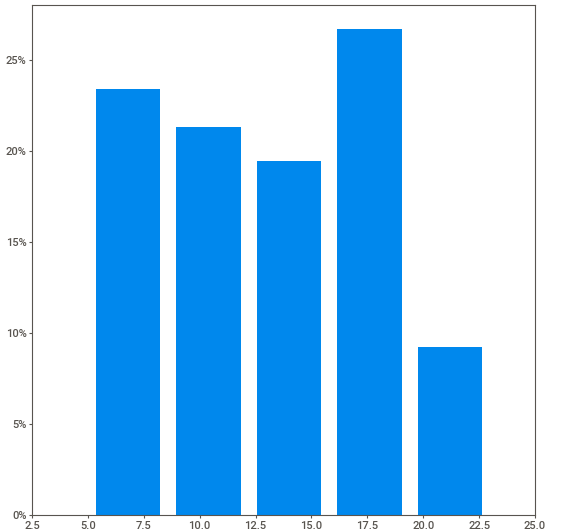
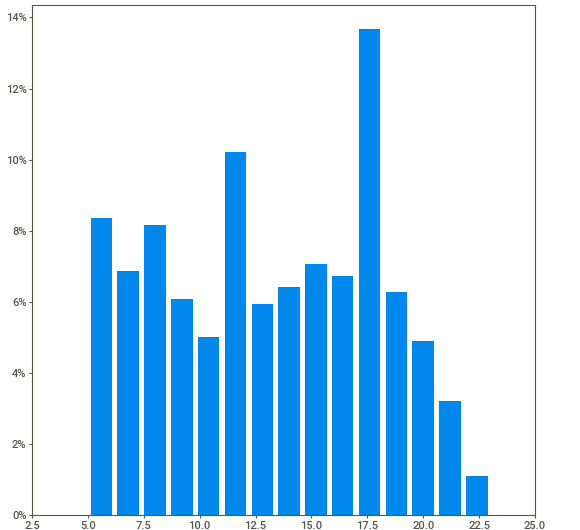
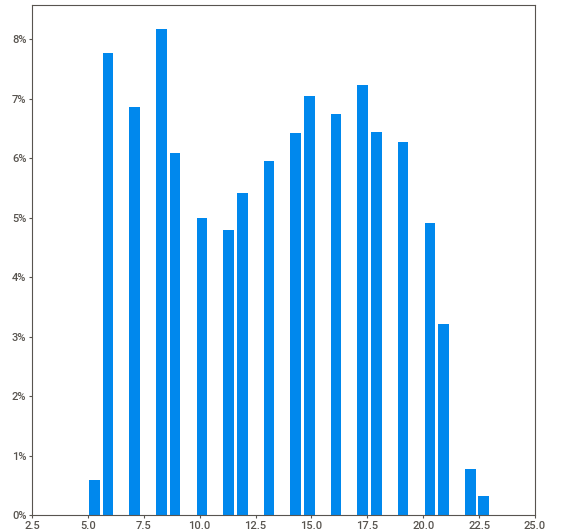
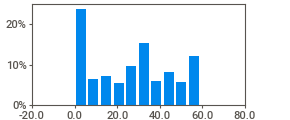
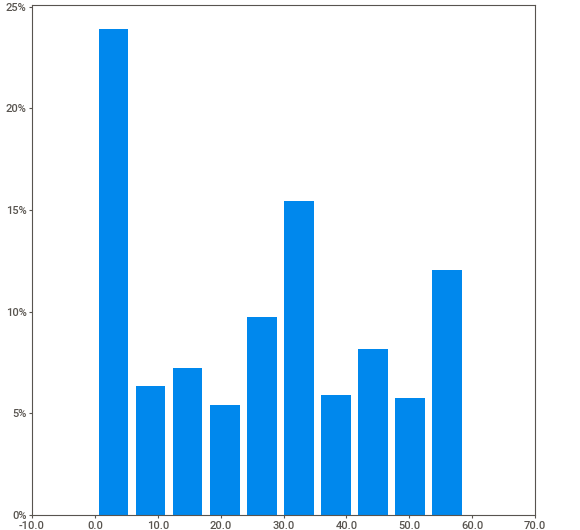
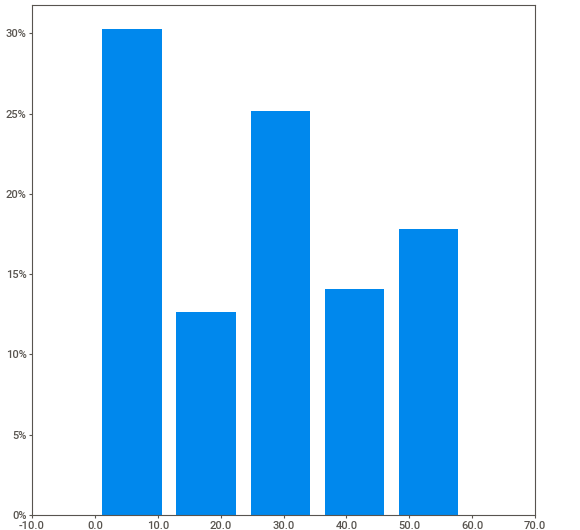
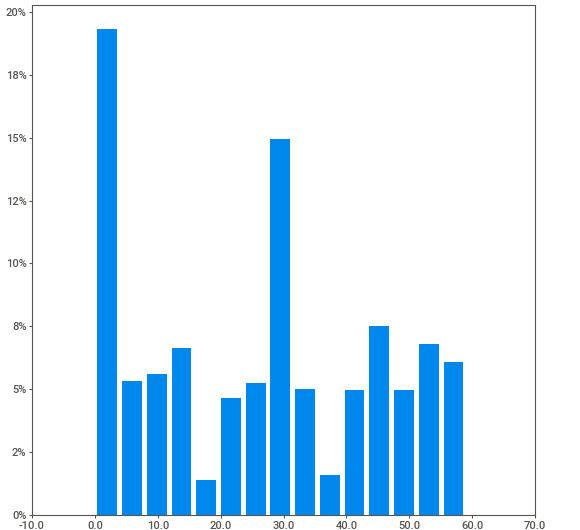
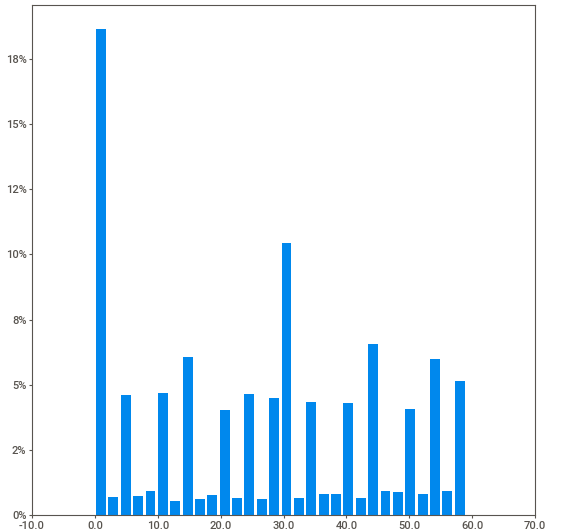
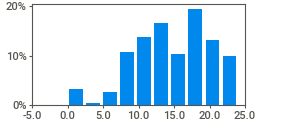
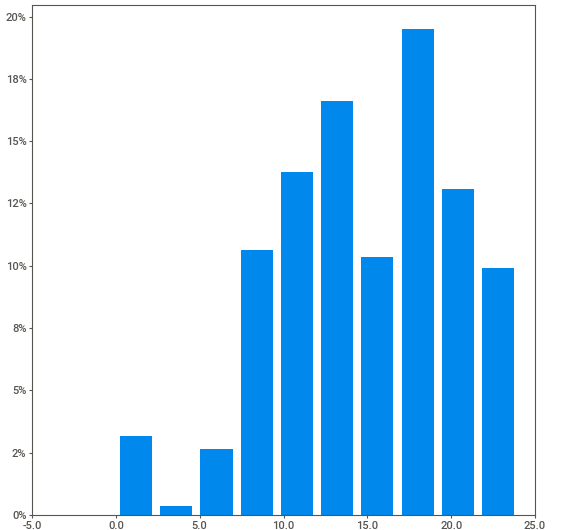
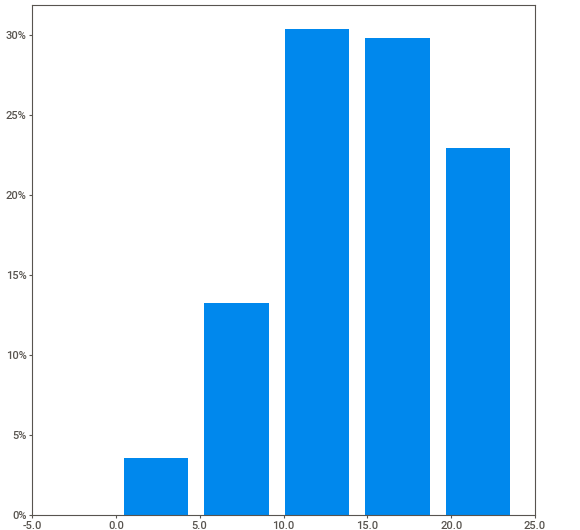
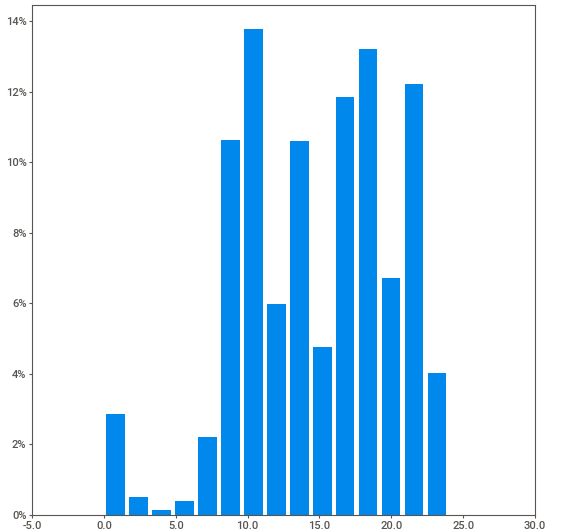
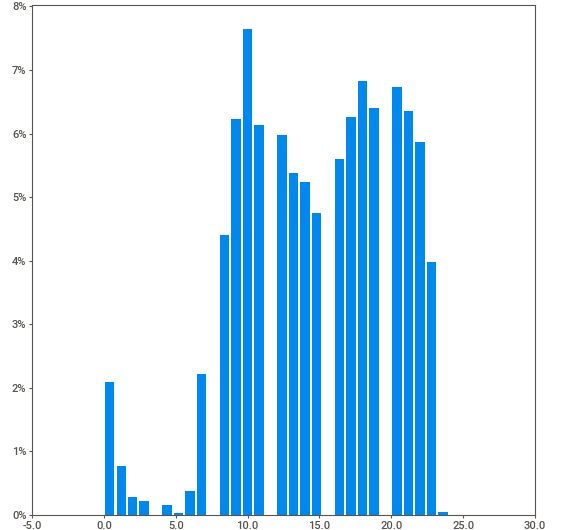
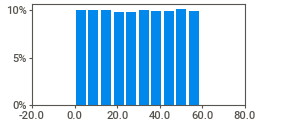
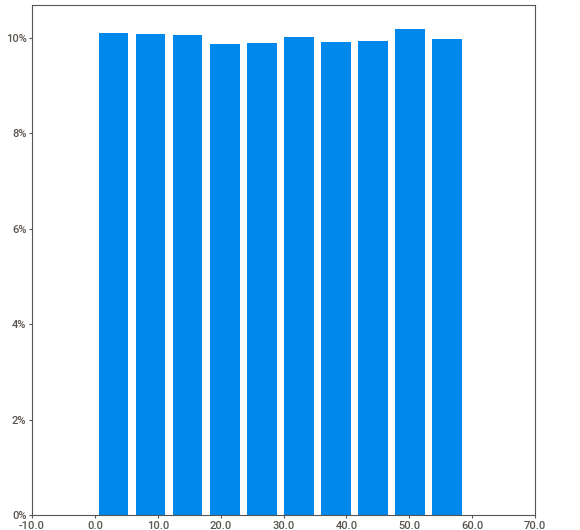
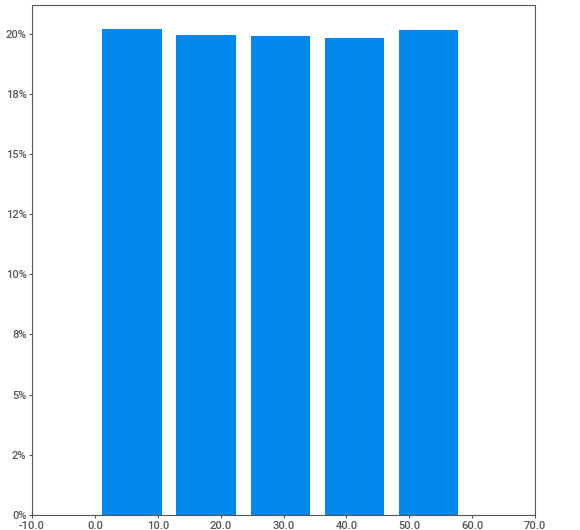
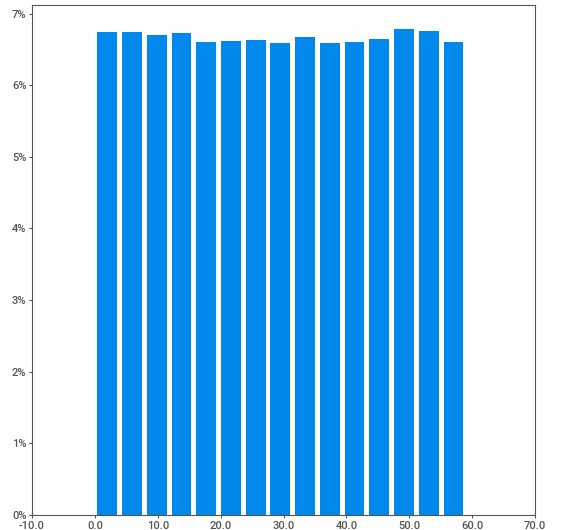
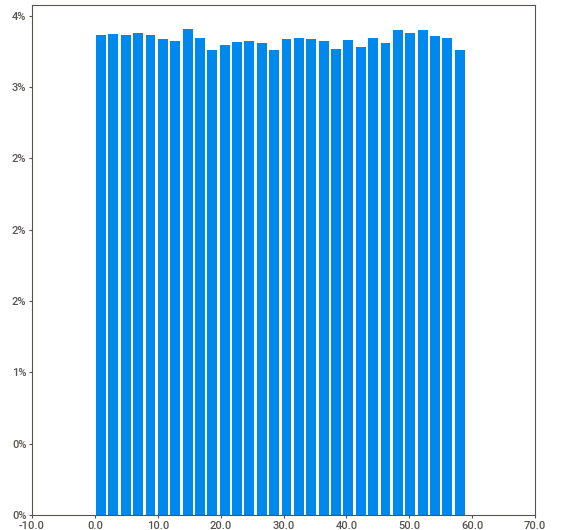
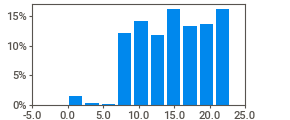
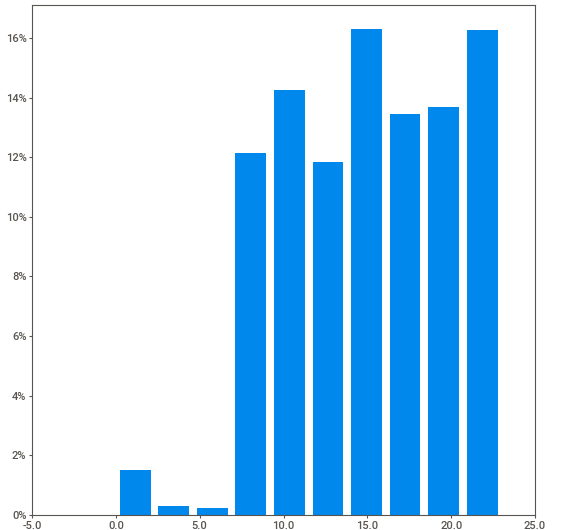
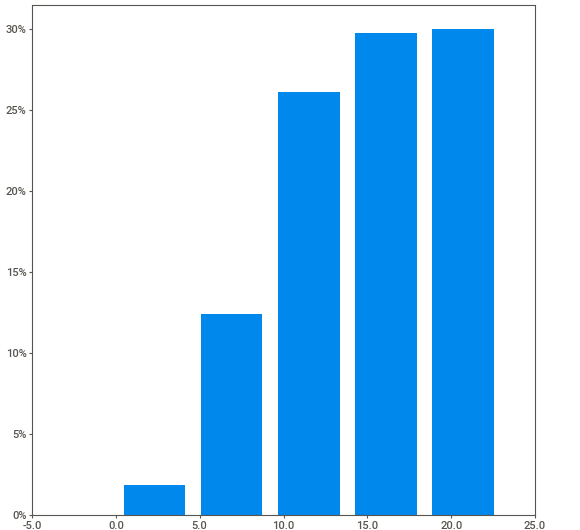
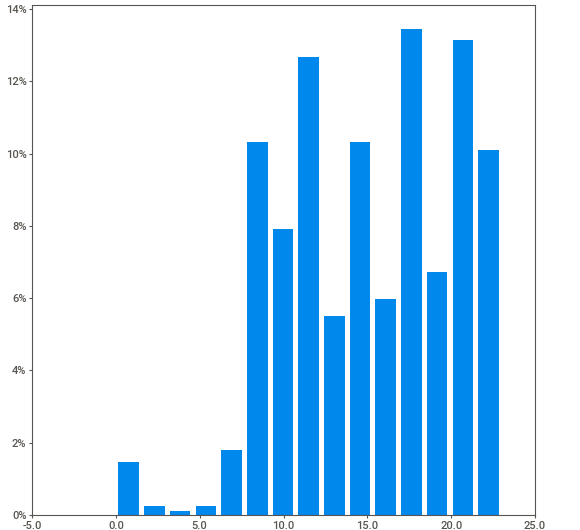
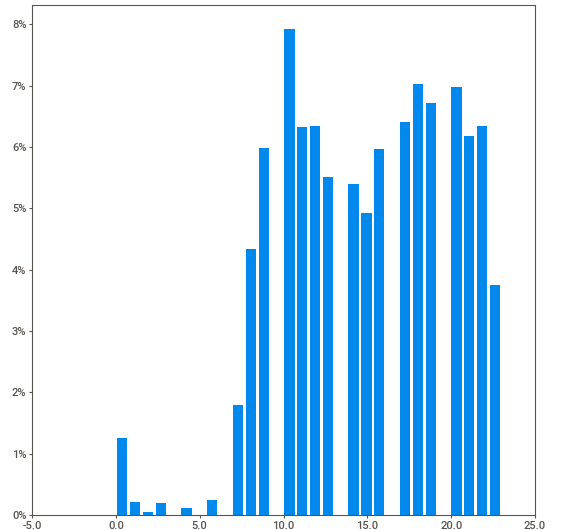
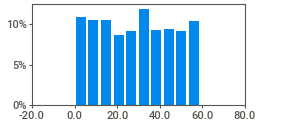
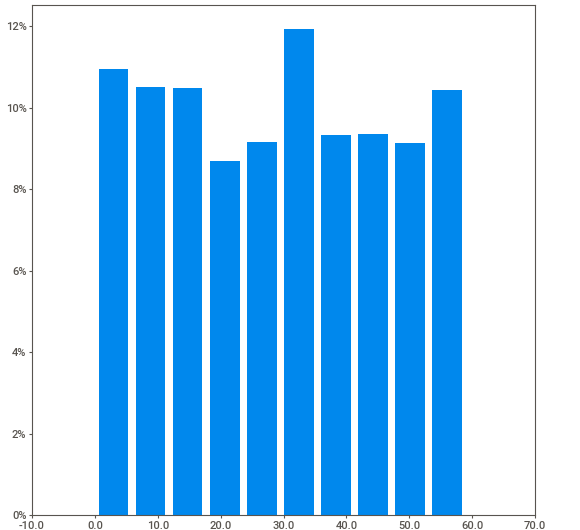
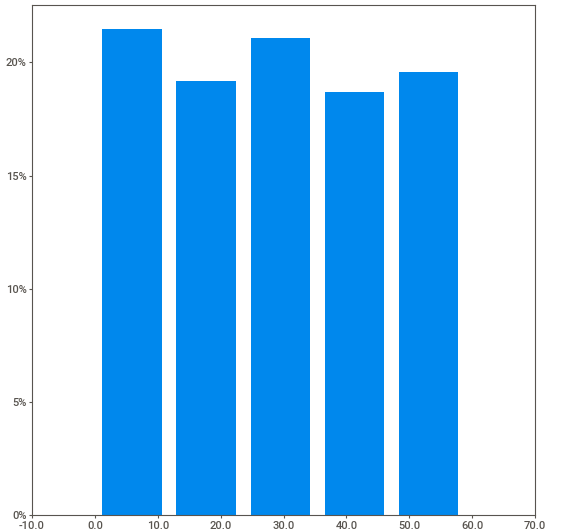
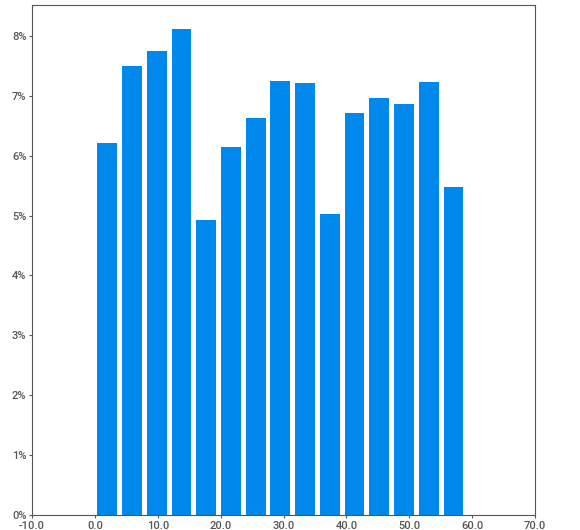
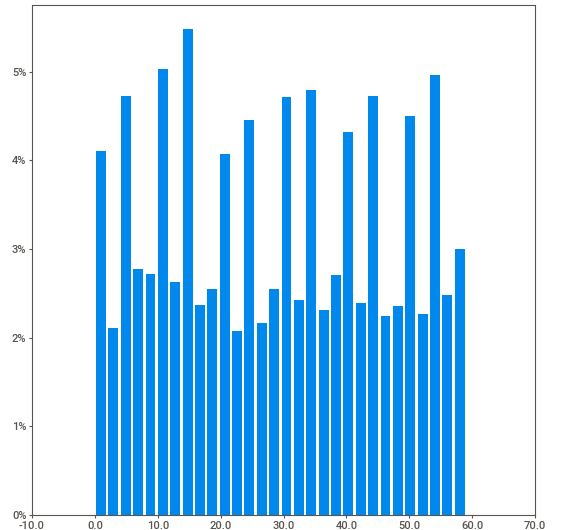
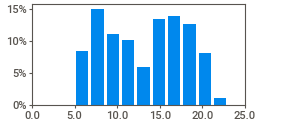
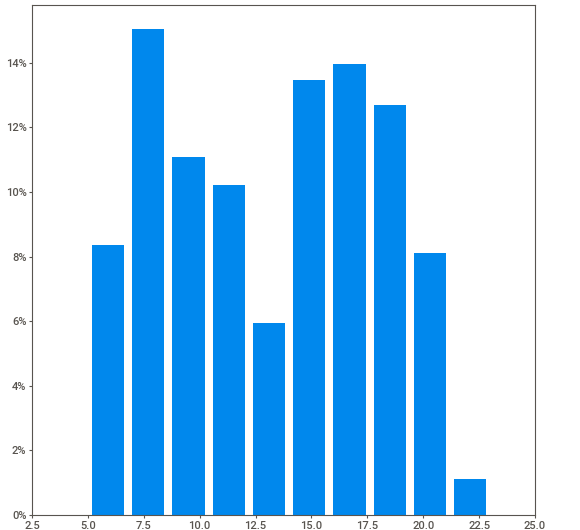
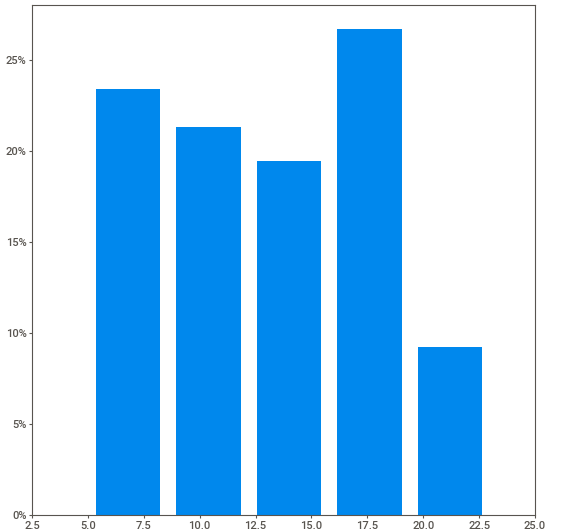
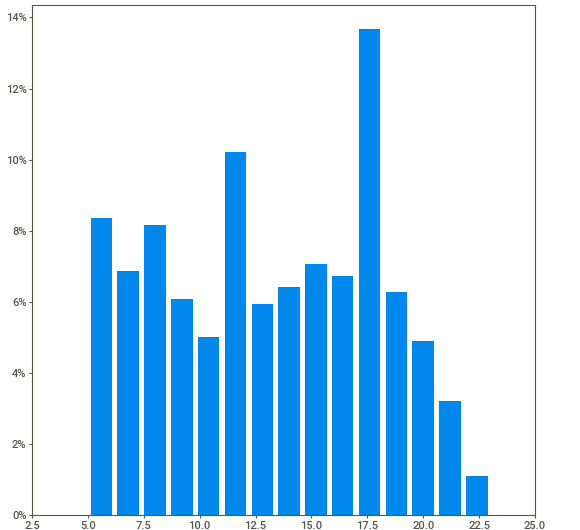
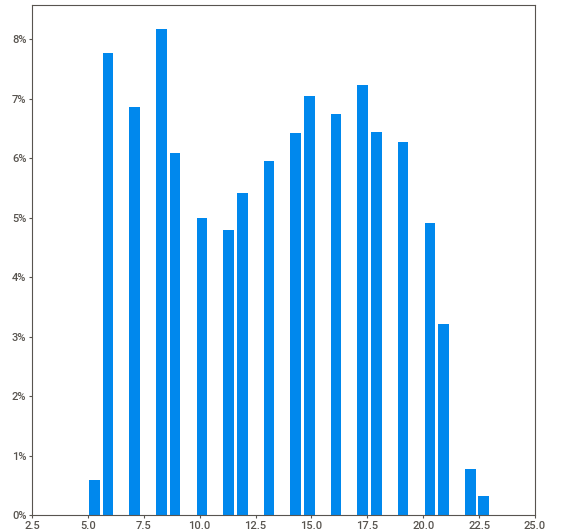
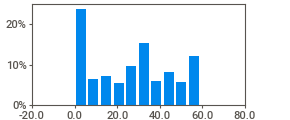
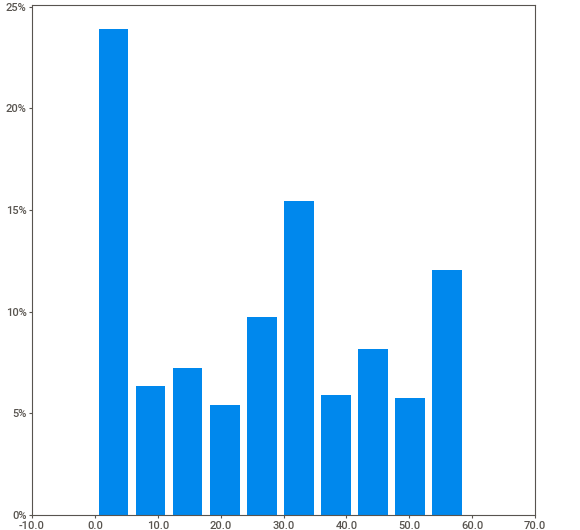
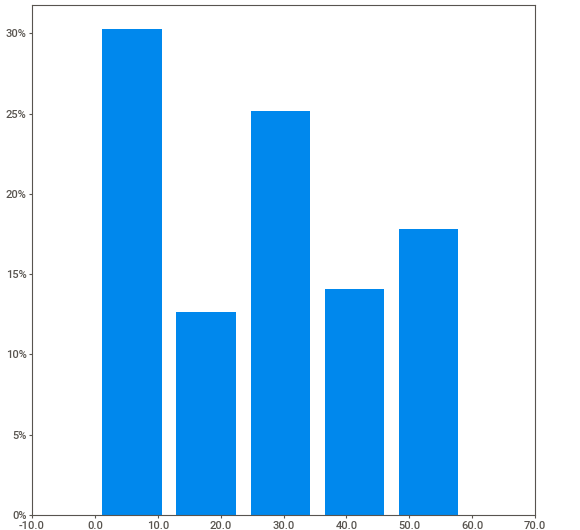
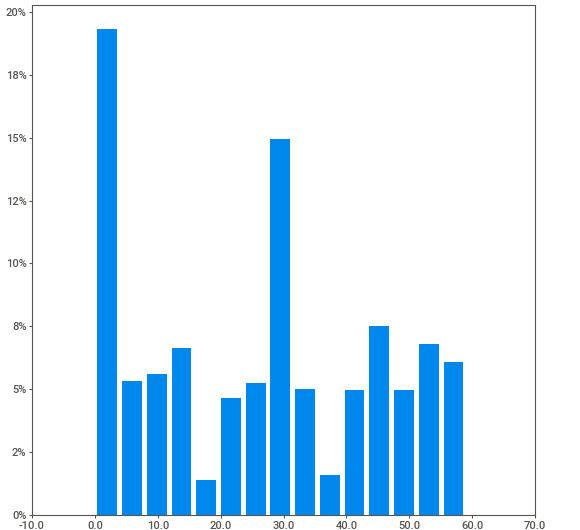
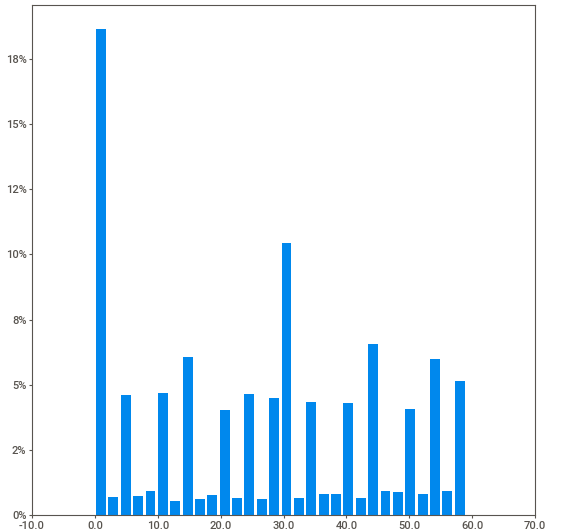
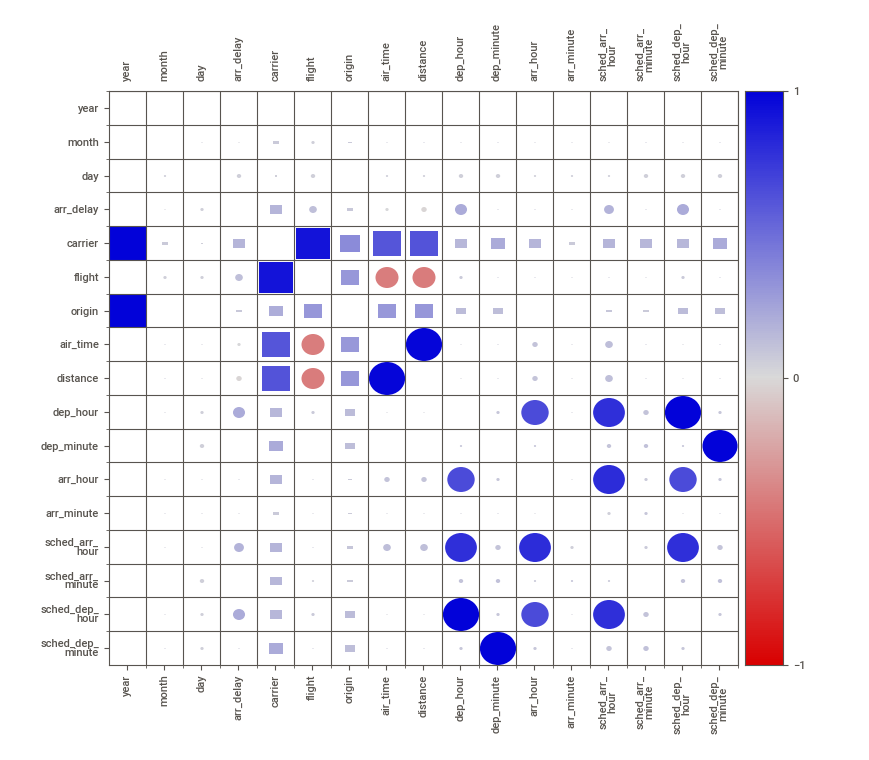
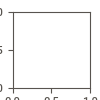

In [5]:
report.show_notebook()

### Save the profile to an HTML file

By default, show_html will open the HTML document in the browser.  Setting `open_browser` to false prevents the page from being opened.

In [6]:
report.show_html("nyc_flights_report.html", open_browser=False)

Report nyc_flights_report.html was generated.
